In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


np.random.seed(0)  # le fichier soit reproductible
pd.options.display.max_columns = None #pour afficher toutes les colonnes

In [2]:
chemin = r"Birthweight.csv"
df = pd.read_csv(chemin, sep=",", error_bad_lines=False)

C:\Users\gladi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


**1.Analyse descriptive**

1.1 Analyse descriptive des variables 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   Length       42 non-null     int64  
 2   Birthweight  42 non-null     float64
 3   Headcirc     42 non-null     int64  
 4   Gestation    42 non-null     int64  
 5   smoker       42 non-null     int64  
 6   mage         42 non-null     int64  
 7   mnocig       42 non-null     int64  
 8   mheight      42 non-null     int64  
 9   mppwt        42 non-null     int64  
 10  fage         42 non-null     int64  
 11  fedyrs       42 non-null     int64  
 12  fnocig       42 non-null     int64  
 13  fheight      42 non-null     int64  
 14  lowbwt       42 non-null     int64  
 15  mage35       42 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 5.4 KB


In [8]:
df.shape

(42, 16)

In [9]:
df.isnull().sum()


ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

In [10]:
df.describe()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,467.616186,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,27.000000,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,537.250000,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,821.000000,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,1269.500000,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,1764.000000,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


In [11]:
#rp.summary_cont(df)

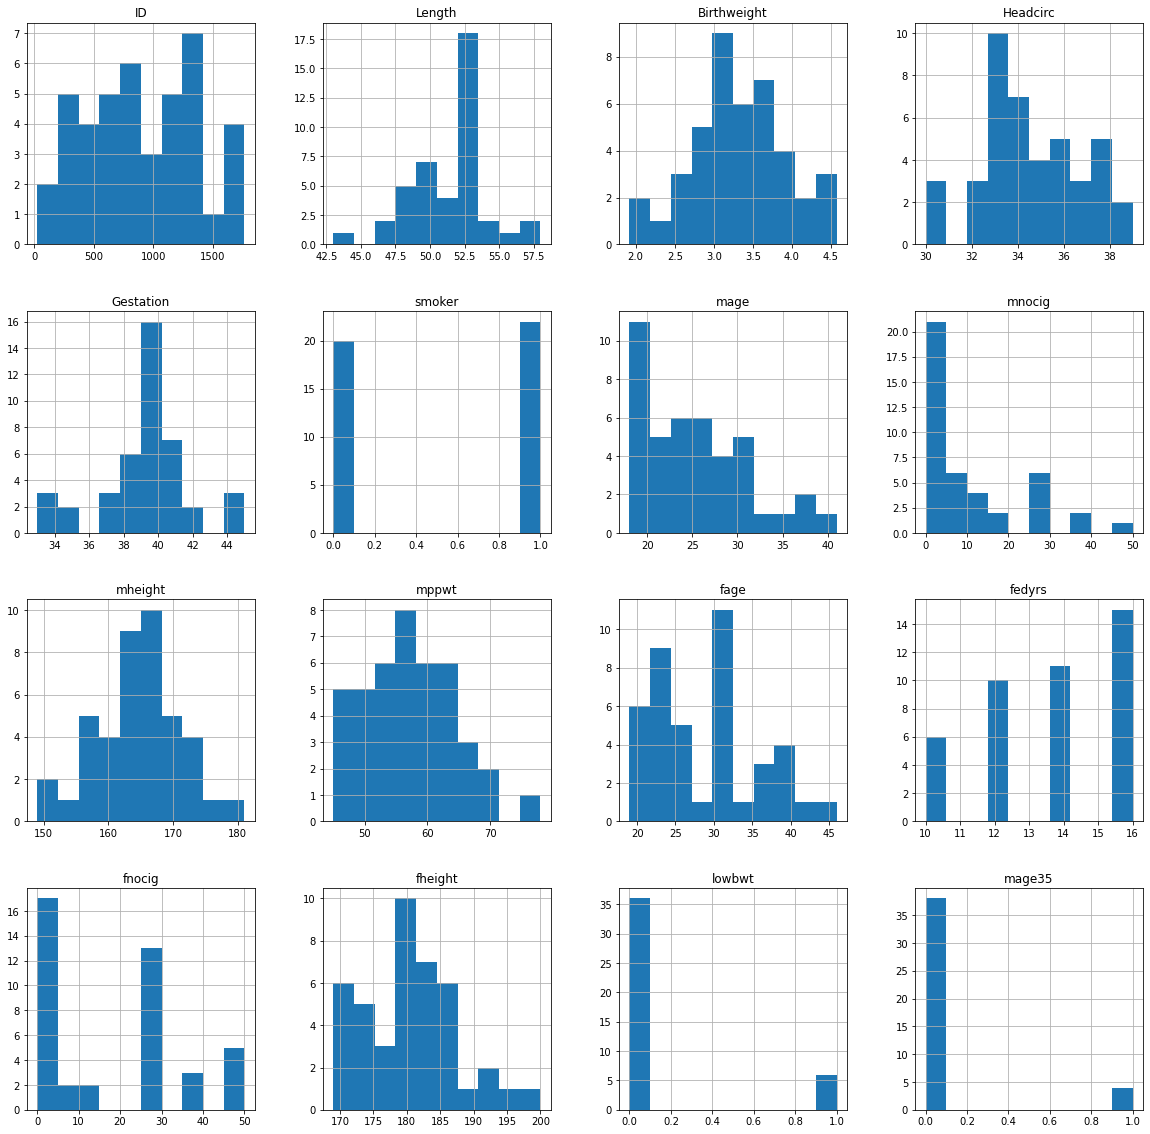

In [12]:
df.hist(figsize=(20, 20))
plt.show()

la distribution des mères fumeuses ou non est  : 
 1    22
0    20
Name: smoker, dtype: int64


<AxesSubplot:>

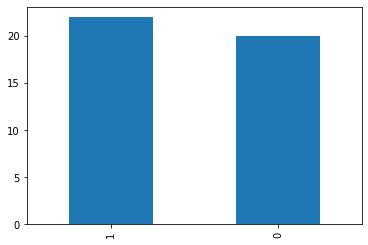

In [13]:
print(f"la distribution des mères fumeuses ou non est  : \n {df['smoker'].value_counts()}")
df['smoker'].value_counts().plot.bar()

In [14]:
m_smoker = df['mnocig']!=0
print(m_smoker)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
Name: mnocig, dtype: bool


In [15]:
m_smoker_percent = m_smoker.value_counts()*100/len(df['smoker'])
m_smoker_percent

True     52.380952
False    47.619048
Name: mnocig, dtype: float64

<AxesSubplot:>

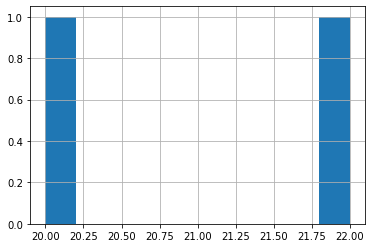

In [16]:
m_smoker.value_counts().hist()

Text(27.0, 0.5, 'number of mothers')

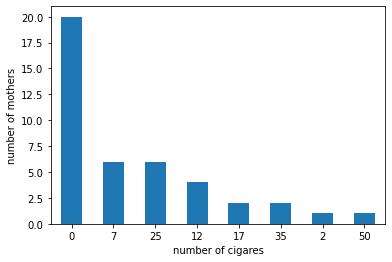

In [17]:
fig, ax = plt.subplots()
fig.canvas.draw()
labels = ['mnocig']

df['mnocig'].value_counts().plot.bar()

plt.xticks(rotation=0)

ax.set_xlabel('number of cigares')
ax.set_ylabel('number of mothers')

In [18]:
f_smoker_mask = df ['fnocig']!=0
f_smoker_mask

0      True
1     False
2      True
3      True
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13     True
14     True
15    False
16    False
17     True
18     True
19    False
20     True
21     True
22    False
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33    False
34     True
35    False
36     True
37     True
38     True
39     True
40     True
41    False
Name: fnocig, dtype: bool

In [19]:
f_smoker = f_smoker_mask.sum()
f_smoker

27

In [20]:
f_smoker_percent = f_smoker_mask.value_counts()*100/len(df['fnocig'])
f_smoker_percent

True     64.285714
False    35.714286
Name: fnocig, dtype: float64

Text(27.0, 0.5, 'number of fathers')

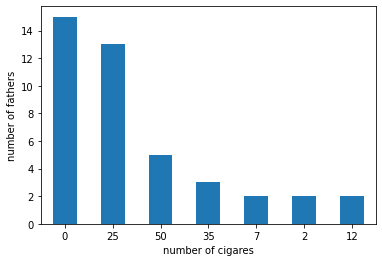

In [21]:
fig, ax = plt.subplots()
fig.canvas.draw()
labels = ['mnocig']

df['fnocig'].value_counts().plot.bar()

plt.xticks(rotation=0)

ax.set_xlabel('number of cigares')
ax.set_ylabel('number of fathers')

1.2 Analyse par rapport à la variable à expliquer "Birthweight"

In [22]:
print(rp.summary_cont(df['Birthweight']))



      Variable     N    Mean      SD      SE  95% Conf.  Interval
0  Birthweight  42.0  3.3129  0.6039  0.0932     3.1247     3.501


In [23]:
df['Birthweight'].kurtosis()

0.038159581146821164

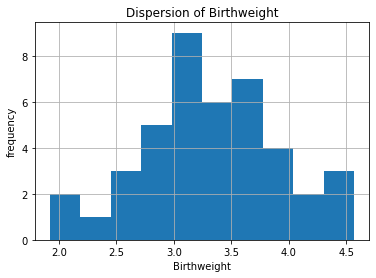

In [24]:
df['Birthweight'].hist()
plt.xlabel('Birthweight')
plt.ylabel('frequency')
plt.title('Dispersion of Birthweight')
plt.show()

Text(0.5, 1.0, 'BoxPlot Birthweight/Gestation')

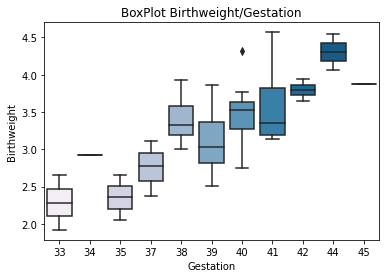

In [25]:
sns.boxplot(data=df, x='Gestation', y='Birthweight', palette='PuBu').set_title('BoxPlot Birthweight/Gestation')

Text(0.5, 1.0, 'BoxPlot Birthweight/mage')

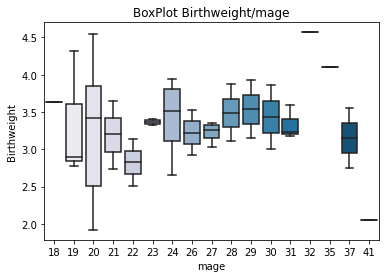

In [26]:
sns.boxplot(data=df, x='mage', y='Birthweight', palette='PuBu').set_title('BoxPlot Birthweight/mage')

Text(0.5, 1.0, 'BoxPlot Birthweight/smoker')

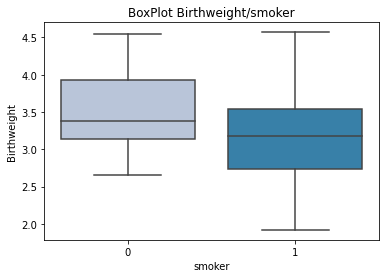

In [27]:
sns.boxplot(data=df, x='smoker', y='Birthweight', palette='PuBu').set_title('BoxPlot Birthweight/smoker')

Text(0.5, 1.0, 'BoxPlot Birthweight/Length')

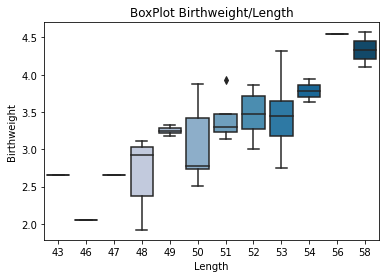

In [28]:
sns.boxplot(data=df, x='Length', y='Birthweight', palette='PuBu').set_title('BoxPlot Birthweight/Length')

Text(0.5, 1.0, 'BoxPlot Birthweight/Headcirc')

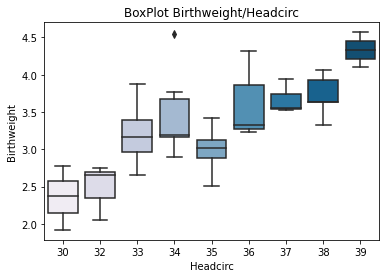

In [29]:
sns.boxplot(data=df, x='Headcirc', y='Birthweight', palette='PuBu').set_title('BoxPlot Birthweight/Headcirc')

** Analyse plus en détail de la variable Birthweight avec l'age des mères"**

In [30]:
birth_mask = df['Birthweight']==3 #le poids moyen des bébés

In [31]:
birth_mask.sum()

1

In [32]:
print(f"l'âge médian des mères est de : {df['mage'].median()}")

l'âge médian des mères est de : 24.0


In [33]:
df_median_mage = df[df['mage'] == 24]
print(df_median_mage)

      ID  Length  Birthweight  Headcirc  Gestation  smoker  mage  mnocig  \
4    553      54         3.94        37         42       0    24       0   
6    820      52         3.77        34         40       0    24       0   
11  1088      51         3.27        36         40       0    24       0   
19  1313      43         2.65        32         33       0    24       0   

    mheight  mppwt  fage  fedyrs  fnocig  fheight  lowbwt  mage35  
4       175     66    30      12       0      184       0       0  
6       157     50    31      16       0      173       0       0  
11      168     53    29      16       0      181       0       0  
19      149     45    26      16       0      169       1       0  


In [34]:
df_median_mage.count().unique()

array([4], dtype=int64)

In [35]:
df_median_mage['Birthweight']

4     3.94
6     3.77
11    3.27
19    2.65
Name: Birthweight, dtype: float64

In [36]:
print(f"les femmes ayant un âge >= 35 :\n {df['mage35'].value_counts()}")

les femmes ayant un âge >= 35 :
 0    38
1     4
Name: mage35, dtype: int64


In [37]:
print(df[df['mage35'] == 1])

      ID  Length  Birthweight  Headcirc  Gestation  smoker  mage  mnocig  \
2    462      58         4.10        39         41       0    35       0   
25   300      46         2.05        32         35       1    41       7   
35    27      53         3.55        37         41       1    37      25   
41  1272      53         2.75        32         40       1    37      50   

    mheight  mppwt  fage  fedyrs  fnocig  fheight  lowbwt  mage35  
2       172     58    31      16      25      185       0       1  
25      166     57    37      14      25      173       1       1  
35      161     66    46      16       0      175       0       1  
41      168     61    31      16       0      173       0       1  


In [38]:
print(df[df['mage'] != (35,24)].min())

ID              27.00
Length          43.00
Birthweight      1.92
Headcirc        30.00
Gestation       33.00
smoker           0.00
mage            18.00
mnocig           0.00
mheight        149.00
mppwt           45.00
fage            19.00
fedyrs          10.00
fnocig           0.00
fheight        169.00
lowbwt           0.00
mage35           0.00
dtype: float64


In [39]:
print(df[df['mage'] != (35,24)].max())

ID             1764.00
Length           58.00
Birthweight       4.57
Headcirc         39.00
Gestation        45.00
smoker            1.00
mage             41.00
mnocig           50.00
mheight         181.00
mppwt            78.00
fage             46.00
fedyrs           16.00
fnocig           50.00
fheight         200.00
lowbwt            1.00
mage35            1.00
dtype: float64


1.3 Analyse de corrélation des variables 

In [40]:
TARGET = 'Birthweight'
FEATURES = df.drop(['Birthweight','ID'], axis=1).columns

In [41]:
corr_matrix = df.corr(method='spearman', min_periods=1)

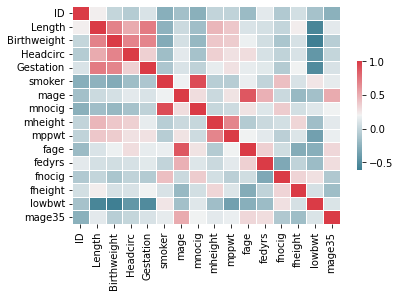

In [42]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = sns.heatmap(corr_matrix, cmap=cmap, cbar_kws={"shrink": .5}, linewidths=.5)
plt.show()

In [43]:
corr_matrix_1 = df[FEATURES].corr(method='spearman', min_periods=1)

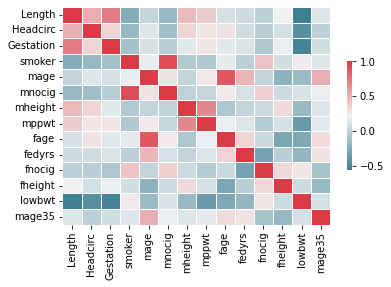

In [44]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = sns.heatmap(corr_matrix_1, cmap=cmap, cbar_kws={"shrink": .5}, linewidths=.5)
plt.show()

**2. FEATURES ENGINEERING**

2.1 Modification des variables qualitatives nominales en variables categorielles en plus de fage et mage pour pouvoir créer de nouvelles variables

In [45]:
df_cat = df.astype({"smoker":"category", "lowbwt":"category", "mage35":"category", "mage":"category", "fage":"category"})

In [46]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           42 non-null     int64   
 1   Length       42 non-null     int64   
 2   Birthweight  42 non-null     float64 
 3   Headcirc     42 non-null     int64   
 4   Gestation    42 non-null     int64   
 5   smoker       42 non-null     category
 6   mage         42 non-null     category
 7   mnocig       42 non-null     int64   
 8   mheight      42 non-null     int64   
 9   mppwt        42 non-null     int64   
 10  fage         42 non-null     category
 11  fedyrs       42 non-null     int64   
 12  fnocig       42 non-null     int64   
 13  fheight      42 non-null     int64   
 14  lowbwt       42 non-null     category
 15  mage35       42 non-null     category
dtypes: category(5), float64(1), int64(10)
memory usage: 5.7 KB


2.2 Modification des variables categorielles en varibles binaires 

pas nécessaire vu qu'elles sont déjà en binaire

2.3 Création de nouvelles variables pertinentes

In [47]:
df.columns

Index(['ID', 'Length', 'Birthweight', 'Headcirc', 'Gestation', 'smoker',
       'mage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig',
       'fheight', 'lowbwt', 'mage35'],
      dtype='object')

In [48]:
#IMC de la mère
df['IMC_mother'] = df['mppwt']/((df['mheight']/100)**2)

In [49]:
df['IMC_mother'].head()

0    21.719250
1    21.203105
2    19.605192
3    22.460034
4    21.551020
Name: IMC_mother, dtype: float64

In [50]:
i=25 #base de calcul conventionnelle pour déterminer si la personne est en surpoids ou pas.

if  i>25 in df['IMC_mother'] :
    print(f"{df['IMC_mother'].count()} sont en surpoids")
else :
    print("aucune mère n'est en surpoids")
i+=1

aucune mère n'est en surpoids


In [51]:
#IMC bébé
df['IMC_baby'] = df['Birthweight']/((df['Length']/100)**2)

In [52]:
df['IMC_baby'].head()

0    14.508929
1    15.379138
2    12.187872
3    14.489142
4    13.511660
Name: IMC_baby, dtype: float64

In [53]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,IMC_mother,IMC_baby
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0,21.719250,14.508929
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0,21.203105,15.379138
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1,19.605192,12.187872
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0,22.460034,14.489142
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0,21.551020,13.511660


In [54]:
IMC_baby_proportion = df['IMC_baby'] == range(13, 20)
#print(IMC_baby_proportion)

if i>=13 or i<20 :
    print(f"{df['IMC_baby'].value_counts().sum()} ont un IMC normal")
else :
    print(f"{df['IMC_baby'].value_counts().sum()} sont en dehors de la norme")
    

42 ont un IMC normal


In [55]:
df['mage'].min()

18

In [56]:
df['mage'].max()

41

In [57]:
median_age = df['mage'].median()

In [58]:
df["cat"] = np.where(df['mage']<median_age, 1, 0) # Création de la cible binaire

In [59]:
bins= [18, 20, 30, 40, 50]
labels = ['1','2','3','4']
df['age_group'] = pd.cut(df['mage'], bins=bins, labels=labels, right=False)
print (df[['age_group', 'mage']])

   age_group  mage
0          2    20
1          1    19
2          3    35
3          2    20
4          2    24
5          2    29
6          2    24
7          2    21
8          1    18
9          2    20
10         2    27
11         2    24
12         3    31
13         2    21
14         2    29
15         2    28
16         2    27
17         2    26
18         1    19
19         2    24
20         2    20
21         2    22
22         1    19
23         2    22
24         2    20
25         4    41
26         2    20
27         3    32
28         3    31
29         2    27
30         3    30
31         2    23
32         2    21
33         2    28
34         3    30
35         3    37
36         2    26
37         2    23
38         3    31
39         2    27
40         2    20
41         3    37


In [60]:
df['age_group'].value_counts()

2    28
3     9
1     4
4     1
Name: age_group, dtype: int64

In [61]:
df[df['age_group']==2]

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,IMC_mother,IMC_baby,cat,age_group


In [62]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,IMC_mother,IMC_baby,cat,age_group
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0,21.719250,14.508929,1,2
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0,21.203105,15.379138,1,1
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1,19.605192,12.187872,0,3
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0,22.460034,14.489142,1,2
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0,21.551020,13.511660,0,2


Text(0.5, 1.0, 'Barplot Birthweight/age_group')

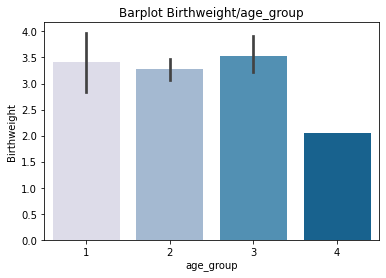

In [63]:
sns.barplot(data=df, x='age_group', y='Birthweight', palette='PuBu').set_title('Barplot Birthweight/age_group')

Text(0.5, 1.0, 'Barplot Gestation/age_group')

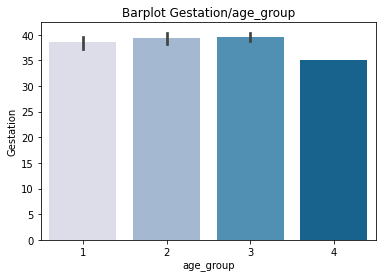

In [64]:
sns.barplot(data=df, x='age_group', y='Gestation', palette='PuBu').set_title('Barplot Gestation/age_group')

**3. TEST DE STUDENT**

#hypothèse nulle : 
le poids des bébés n'a aucun lien avec le fait que la mère soit fumeuse ou non

In [65]:
#poids moyen
print(f"le poids moyen des bébés est : \n {df['Birthweight'].mean().__round__()}")

le poids moyen des bébés est : 
 3


3.1 Comparaison mères fumeuses et non fumeuses sur le poids des nouveaux-nés

In [66]:
df = df.drop(['ID'], axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Length       42 non-null     int64   
 1   Birthweight  42 non-null     float64 
 2   Headcirc     42 non-null     int64   
 3   Gestation    42 non-null     int64   
 4   smoker       42 non-null     int64   
 5   mage         42 non-null     int64   
 6   mnocig       42 non-null     int64   
 7   mheight      42 non-null     int64   
 8   mppwt        42 non-null     int64   
 9   fage         42 non-null     int64   
 10  fedyrs       42 non-null     int64   
 11  fnocig       42 non-null     int64   
 12  fheight      42 non-null     int64   
 13  lowbwt       42 non-null     int64   
 14  mage35       42 non-null     int64   
 15  IMC_mother   42 non-null     float64 
 16  IMC_baby     42 non-null     float64 
 17  cat          42 non-null     int32   
 18  age_group    42 non-null     cat

In [68]:
stats.ttest_1samp(df['smoker'], 3)

Ttest_1sampResult(statistic=-31.746724956356452, pvalue=1.7320289511590088e-30)

Remarques :

pvalue > 5% => on ne rejette pas l'hypothèse nulle

**4. Test de Chi2**

4.1 Déterminer l'indépendance des variables entre fumeuse et "lowbwt"

#hypothèse nulle : lowbwt n'a aucun rapport avec le fait que la mère soit fumeuse. 

In [69]:
X = df["lowbwt"]
Y = m_smoker

cont_table = pd.crosstab(index=X, columns=Y, margins=False) #création table de contingence

In [70]:
cont_table

mnocig,False,True
lowbwt,,
0,19,17
1,1,5


In [71]:
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont_table)#test de CHI2
print(f"Test CHI2 = {st_chi2}")
print(f"p_value = {st_p}")
print(f"degré de liberté = {st_dof}")
print(f"Tableau de fréquence = {st_exp}")

alpha = 0.01
if st_p > alpha:
    print("\n")
    print('Conclusion : 0n ne rejette pas H0')
else:
    print("\n")
    print('Conclusion : On rejette H0')

Test CHI2 = 1.4357954545454548
p_value = 0.23082094094618558
degré de liberté = 1
Tableau de fréquence = [[17.14285714 18.85714286]
 [ 2.85714286  3.14285714]]


Conclusion : 0n ne rejette pas H0


**5. Test de normalité : Shapiro-Wilk test**

5.1 définir si "birthweight" suit une loi normale

#Hypothèse nulle : "Birthweight" suit une loi normale

<AxesSubplot:>

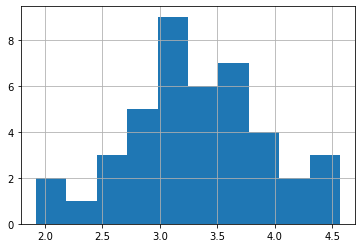

In [72]:
df['Birthweight'].hist()

In [73]:
stat, p = shapiro(df['Birthweight'])

alpha = 0.05
if p > alpha:
    print(p)
    print('"Birthweight" semble Gaussien (On ne rejette pas H0)')
else:
    print(p)
    print('"Birthweith" ne paraît pas suivre une loi normale (rejet H0)')
    

0.9684654474258423
"Birthweight" semble Gaussien (On ne rejette pas H0)


**6. Régression linéaire**

6.1 Vérifier que les hypothèses sont vérifiées

Cela a été fait pour chaque modèle lors de leur entraînement

6.2 Implémenter une régression linéaire

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Length       42 non-null     int64   
 1   Birthweight  42 non-null     float64 
 2   Headcirc     42 non-null     int64   
 3   Gestation    42 non-null     int64   
 4   smoker       42 non-null     int64   
 5   mage         42 non-null     int64   
 6   mnocig       42 non-null     int64   
 7   mheight      42 non-null     int64   
 8   mppwt        42 non-null     int64   
 9   fage         42 non-null     int64   
 10  fedyrs       42 non-null     int64   
 11  fnocig       42 non-null     int64   
 12  fheight      42 non-null     int64   
 13  lowbwt       42 non-null     int64   
 14  mage35       42 non-null     int64   
 15  IMC_mother   42 non-null     float64 
 16  IMC_baby     42 non-null     float64 
 17  cat          42 non-null     int32   
 18  age_group    42 non-null     cat

In [75]:
df_cat = df.select_dtypes(['category']).columns
df[df_cat] = df[df_cat].apply(lambda x: x.cat.codes)
 
print(df_cat)

Index(['age_group'], dtype='object')


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Length       42 non-null     int64  
 1   Birthweight  42 non-null     float64
 2   Headcirc     42 non-null     int64  
 3   Gestation    42 non-null     int64  
 4   smoker       42 non-null     int64  
 5   mage         42 non-null     int64  
 6   mnocig       42 non-null     int64  
 7   mheight      42 non-null     int64  
 8   mppwt        42 non-null     int64  
 9   fage         42 non-null     int64  
 10  fedyrs       42 non-null     int64  
 11  fnocig       42 non-null     int64  
 12  fheight      42 non-null     int64  
 13  lowbwt       42 non-null     int64  
 14  mage35       42 non-null     int64  
 15  IMC_mother   42 non-null     float64
 16  IMC_baby     42 non-null     float64
 17  cat          42 non-null     int32  
 18  age_group    42 non-null     int8   
dtypes: float64

In [77]:
FEATURES

Index(['Length', 'Headcirc', 'Gestation', 'smoker', 'mage', 'mnocig',
       'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig', 'fheight', 'lowbwt',
       'mage35'],
      dtype='object')

In [78]:
X = df[FEATURES]
Y = df[TARGET]
# create a fitted model
#lm = smf.ols(formula='Length ~ Headcirc + Gestation + smoker + mage + mnocig + mheight + mppwt + fage + fedyrs + fnocig + fheight + lowbwt + mage35',data=df
#            ).fit()

# entraînement du modèle
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

-3.8643284541912273
[ 0.04434136  0.08873408  0.09311026 -0.21938482  0.01339414  0.00191808
  0.00273716  0.00908094 -0.00782752 -0.00589484  0.00221167 -0.01504573
 -0.0346887  -0.48252945]


6.3 Vérifier la significativité des variables explicatives

In [79]:
# calcul du R-squared
lm.score(X, Y)

0.8032171045823798

In [80]:
val_predict = lm.predict(X)
val_predict 

array([4.10675619, 3.7173333 , 3.90423346, 4.24176878, 4.04972394,
       3.65596329, 3.44815067, 3.65997085, 3.80645126, 3.18220605,
       3.67514377, 3.53391827, 3.43411661, 3.46020536, 3.60535137,
       2.99819819, 3.39711961, 2.90042729, 3.19579352, 2.21716823,
       3.61997795, 3.24708873, 2.51241366, 2.83475961, 2.34980618,
       2.15192428, 2.07436225, 4.29414678, 3.18228972, 3.38160482,
       3.34595202, 3.57852844, 2.97874874, 3.52854597, 3.69619711,
       3.38070558, 3.69238526, 3.2663868 , 2.91528026, 3.37377971,
       2.53197944, 3.01313668])

In [81]:
lm.coef_

array([ 0.04434136,  0.08873408,  0.09311026, -0.21938482,  0.01339414,
        0.00191808,  0.00273716,  0.00908094, -0.00782752, -0.00589484,
        0.00221167, -0.01504573, -0.0346887 , -0.48252945])

6.4 Evaluer le modèle 

In [82]:
predictions = []
model = lm
preds = model.predict(df[FEATURES])
predictions.append(preds)

In [83]:
predictions_vf = np.mean(predictions,0)

In [84]:
mse = mean_squared_error(predictions_vf,df[TARGET])
mse

0.07005591556191003

In [85]:
#calcul du ratio
rmse = np.sqrt(mse)
print(rmse)

0.2646807804921053
